In [2]:
# ***Data Preprocessing***
    
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')
# We need only the age and the estimated salary column 
X = df.iloc[:, [2,3]].values
# This is our dependent purchase column
y = df.iloc[:, -1].values

# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [3]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel= 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [4]:
# Fitting Logistic Regression Model to our training dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0)
classifier.fit(X_train, y_train)

/home/amit_bahir/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
# Predicting the test set result
y_pred = classifier.predict(X_test)

In [6]:
# Making the Confusion Matrix
# It contains the correct and incorrect predictions made by our model on the test set
from sklearn.metrics import confusion_matrix
# Its a function
# Class contains a capital at the beginning 
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  4],
       [ 4, 18]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


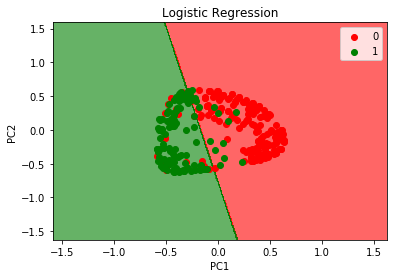

<Figure size 2160x720 with 0 Axes>

In [8]:

# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(X_set[:,0].min() - 1, X_set[:,0].max() + 1, 0.01),
                     np.arange(X_set[:,1].min() - 1, X_set[:,1].max() + 1, 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.6, cmap = ListedColormap(('red', 'green')))
# alpha is the -> The alpha blending value, between 0 (transparent) and 1 (opaque).
# Alpha blending is the process of combining a translucent foreground color with 
# a background color, thereby producing a new blended color. 

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression')
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.legend()
plt.figure(figsize= (30,10))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


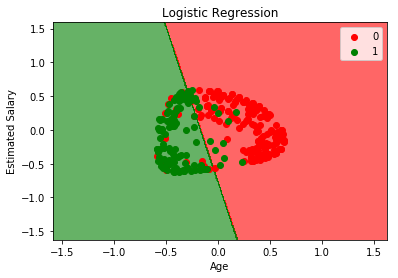

<Figure size 2160x720 with 0 Axes>

In [9]:

# Visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(X_set[:,0].min() - 1, X_set[:,0].max() + 1, 0.01),
                     np.arange(X_set[:,1].min() - 1, X_set[:,1].max() + 1, 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.6, cmap = ListedColormap(('red', 'green')))
# alpha is the -> The alpha blending value, between 0 (transparent) and 1 (opaque).
# Alpha blending is the process of combining a translucent foreground color with 
# a background color, thereby producing a new blended color. 

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.figure(figsize= (30,10))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


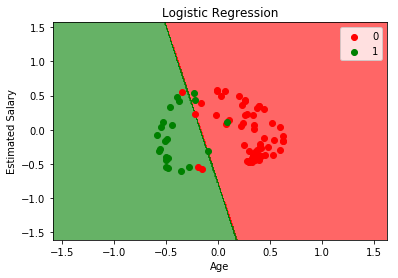

<Figure size 2160x720 with 0 Axes>

In [10]:
# Visualizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(X_set[:,0].min() - 1, X_set[:,0].max() + 1, 0.01),
                     np.arange(X_set[:,1].min() - 1, X_set[:,1].max() + 1, 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.6, cmap = ListedColormap(('red', 'green')))
# alpha is the -> The alpha blending value, between 0 (transparent) and 1 (opaque).
# Alpha blending is the process of combining a translucent foreground color with 
# a background color, thereby producing a new blended color. 

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression')
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.figure(figsize= (30,10))
plt.show()